# Stacking a bit of TPE

In [1]:
%matplotlib notebook

In [2]:
# imports
import sys, os
import numpy as np

from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck15 as cosmo
from astropy.table import Table

from linetools.spectra import utils as lisu
from specdb.specdb import IgmSpec

#
sys.path.append(os.path.abspath("py/"))
import tpe_sample as tps
# 
from xastropy.xutils import xdebug as xdb

## Load sample (31.2)

In [3]:
tpe = Table.read('TPE_DR12_31.2_spec.fits')
tpe

FG_Z,FG_LOGLV,FG_G_UV,FG_RA,FG_DEC,BG_Z,BG_RA,BG_DEC,BG_LYA_INSTRUMENT,BG_LYA_FILE
float64,float32,float64,float64,float64,float64,float64,float64,str8,str39
2.49989199638,31.2492,2.54958948237,2.3007609942,0.403700752107,2.67382001877,2.27892147039,0.547952032001,BOSS,SDSSJ000906.94+003252.7.fits
3.93551397324,31.3945,12.5481503356,4.58631607778,14.3143285668,4.234623909,4.55787042973,14.4154668131,ESI,SDSSJ001813.89+142455.6_F.fits.gz
2.67487096786,31.416,6.59105801546,8.76572075,0.278229046341,3.31621098518,8.65995326009,0.238155226842,BOSS,SDSSJ003438.39+001417.4.fits
2.26354598999,31.2775,3.78065717013,11.5881277113,24.1823462354,2.44457507133,11.6897861895,24.1050092902,BOSS,SDSSJ004645.55+240618.0.fits
2.31980490685,31.2621,2.34953192808,12.234769899,0.946705498098,2.62196707726,12.2067948769,1.09543690923,BOSS,SDSSJ004849.63+010543.5.fits
2.50811910629,31.4953,3.23507022412,14.5596721098,1.25839847112,2.77410197258,14.4361717235,1.13842679507,BOSS,SDSSJ005744.68+010818.3.fits
2.4849998951,31.5575,1115.08614949,17.9586150746,14.0281577616,2.93550395966,17.9558203147,14.0377133359,LRIS,SDSSJ011149.40+140215.8_b1200_F.fits.gz
2.39916491508,31.2724,3.74699182303,22.5595907086,-0.110891725119,2.90742206573,22.6808727047,-0.126460294826,BOSS,SDSSJ013043.41-000735.3.fits
2.39916491508,31.2724,2.21284168806,22.5595907086,-0.110891725119,2.91620802879,22.5567805139,0.0481982699256,BOSS,SDSSJ013013.63+000253.5.fits


## Load spectra

In [4]:
igmsp = IgmSpec()
qpq_file = os.getenv('DROPBOX_DIR')+'/QSOPairs/spectra/qpq_oir_spec.hdf5'
qpq = IgmSpec(db_file=qpq_file, skip_test=True)

Database is igmspec
Created on 2017-Jan-05
Database is QPQ
Created on 2017-Jan-02


### Coordinates

In [5]:
b_coords = SkyCoord(ra=tpe['BG_RA'], dec=tpe['BG_DEC'], unit='deg')
f_coords = SkyCoord(ra=tpe['FG_RA'], dec=tpe['FG_DEC'], unit='deg')

### Cut on impact parameter

In [6]:
# Cosmology
kpc_amin = cosmo.kpc_comoving_per_arcmin(tpe['FG_Z'])  # kpc per arcmin

In [7]:
ang_seps = b_coords.separation(f_coords)
rho = ang_seps.to('arcmin') * kpc_amin / (1+tpe['FG_Z'])

<IPython.core.display.Javascript object>


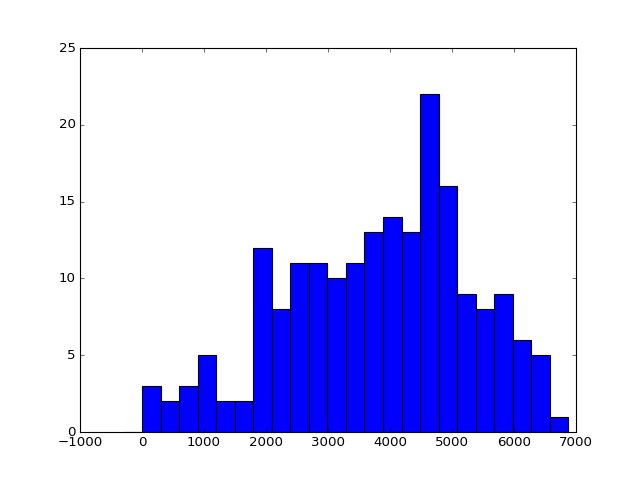

In [8]:
# Plot
xdb.xhist(rho.value)

### Stack a subset

In [9]:
cut_R = rho.to('Mpc').value < 4
np.sum(cut_R)

98

In [10]:
tpe[cut_R]

FG_Z,FG_LOGLV,FG_G_UV,FG_RA,FG_DEC,BG_Z,BG_RA,BG_DEC,BG_LYA_INSTRUMENT,BG_LYA_FILE
float64,float32,float64,float64,float64,float64,float64,float64,str8,str39
3.93551397324,31.3945,12.5481503356,4.58631607778,14.3143285668,4.234623909,4.55787042973,14.4154668131,ESI,SDSSJ001813.89+142455.6_F.fits.gz
2.67487096786,31.416,6.59105801546,8.76572075,0.278229046341,3.31621098518,8.65995326009,0.238155226842,BOSS,SDSSJ003438.39+001417.4.fits
2.26354598999,31.2775,3.78065717013,11.5881277113,24.1823462354,2.44457507133,11.6897861895,24.1050092902,BOSS,SDSSJ004645.55+240618.0.fits
2.4849998951,31.5575,1115.08614949,17.9586150746,14.0281577616,2.93550395966,17.9558203147,14.0377133359,LRIS,SDSSJ011149.40+140215.8_b1200_F.fits.gz
2.39916491508,31.2724,3.74699182303,22.5595907086,-0.110891725119,2.90742206573,22.6808727047,-0.126460294826,BOSS,SDSSJ013043.41-000735.3.fits
3.16700005531,31.4852,831.522317098,24.1232678295,15.0480795383,3.38800001144,24.1307876106,15.0384509056,LRIS,SDSSJ013631.39+150218.4_b400_F.fits.gz
2.72653388977,31.3401,28.4453707847,37.1837244213,0.038057968483,2.99216508865,37.2046746904,-0.00768860300224,BOSS,SDSSJ022849.12-000027.6.fits
3.29636406898,31.8152,49.6218871763,46.2077418647,-0.137097009065,3.45733904839,46.2745786632,-0.104609147319,SDSS,SDSSJ030505.90-000616.6.fits
2.11539697647,31.3189,10.085959213,47.5125610872,-0.779370386489,2.1877040863,47.4679397181,-0.8424203129,SDSS,SDSSJ030952.30-005032.7.fits


In [11]:
bin_igmsp = igmsp.qcat.match_coord(b_coords[cut_R])
bin_igmsp[0:3]

Your search yielded 97 matches


5191
9654
12752


In [12]:
b_coords[cut_R][0]

<SkyCoord (ICRS): (ra, dec) in deg
    (4.55787043, 14.41546681)>

In [13]:
keep = bin_igmsp >= 0
bin_igmsp = bin_igmsp[keep]

In [14]:
# Cut on BOSS
boss = (igmsp.qcat.cat['flag_survey'][bin_igmsp] % 2) >= 1
boss.shape

(97,)

In [15]:
good_IDs = bin_igmsp[boss]
good_IDs.shape

(88,)

In [16]:
good_IDs[0]

5191

In [20]:
np.random.shuffle(good_IDs)

In [21]:
good_IDs[0]

133919

### Grab spectra

In [22]:
spec, meta = igmsp.idb.grab_spec(['BOSS_DR12'], good_IDs, verbose=True)

In [24]:
spec[0]

<XSpectrum1D: file=none, nspec=88, select=0, wvmin=3599.15 Angstrom, wvmax=10284.9 Angstrom>

<IPython.core.display.Javascript object>


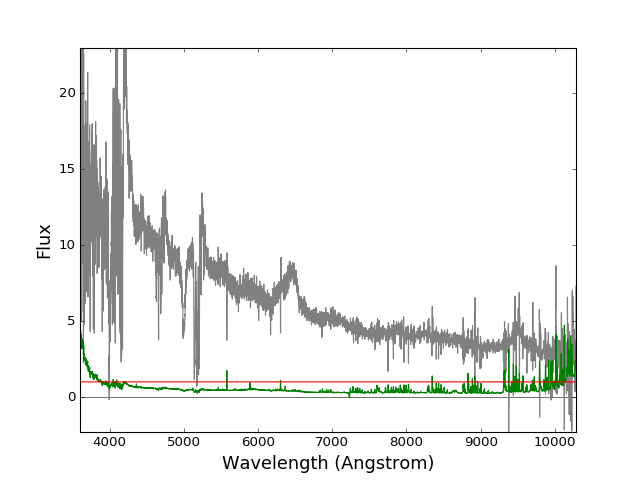

In [25]:
spec[0].plot()

In [23]:
meta[0]['IGM_ID'][0]

133919

### Rebin

In [ ]:
reb_spec = lisu.rebin_to_rest(spec, )